In [1]:
# Importing Libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('dark_background')

#  Reading CSV

In [3]:
df = pd.read_csv('../input/swiggys-top-rated-restaurants-in-delhi/rest_delhi1.csv')
df.head()

,name,cuisine,location,rating,num_of_rating,price_for_two
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


In [4]:
df.shape

(912, 6)

In [5]:
df.columns

Index(['name', 'cuisine', 'location', 'rating', 'num_of_rating',
       'price_for_two'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           912 non-null    object
 1   cuisine        912 non-null    object
 2   location       912 non-null    object
 3   rating         912 non-null    object
 4   num_of_rating  912 non-null    object
 5   price_for_two  912 non-null    object
dtypes: object(6)
memory usage: 42.9+ KB


# Dropping Duplicates

In [7]:
df.drop_duplicates(inplace = True)
df.shape

(764, 6)

# Data Cleaning 

## Cleaning rating column

In [8]:
df['rating'].unique()

array(['4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4.0', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3.0',
       '2.9', '2.8', '2.7', '2.3', '2.2', '--'], dtype=object)

## Removing '--' from rating column

In [9]:
def handlerating(value):
    if value == '--':
        return np.nan
    else:
        return float(value)

df['rating'] = df['rating'].apply(handlerating)


unique_ratings = df['rating'].unique()
print(unique_ratings)

[4.7 4.6 4.5 4.4 4.3 4.2 4.1 4.  3.9 3.8 3.7 3.6 3.5 3.4 3.3 3.2 3.1 3.
 2.9 2.8 2.7 2.3 2.2 nan]


In [10]:
df.rating.isnull().sum()

316

# Filling Null values in Rating column with Mean

In [11]:
df['rating'].fillna(df['rating'].mean(), inplace = True)
df['rating'].isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           764 non-null    object 
 1   cuisine        764 non-null    object 
 2   location       764 non-null    object 
 3   rating         764 non-null    float64
 4   num_of_rating  764 non-null    object 
 5   price_for_two  764 non-null    object 
dtypes: float64(1), object(5)
memory usage: 41.8+ KB


In [13]:
df.head()

,name,cuisine,location,rating,num_of_rating,price_for_two
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


# Renaming a column

In [14]:
df.rename(columns = {'price_for_two':'cost2plates'},inplace=True)
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,₹ 200
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,₹ 200
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,₹ 500
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,₹ 400
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,₹ 200


# Cleaning cost2plates column

In [15]:
df['cost2plates'].unique()

array(['₹ 200', '₹ 500', '₹ 400', '₹ 150', '₹ 350', '₹ 600', '₹ 300',
       '₹ 1500', '₹ 1400', '₹ 800', '₹ 250', '₹ 120', '₹ 100', '₹ 550',
       '₹ 450', '₹ 1200', '₹ 220', '₹ 1100', '₹ 900', '₹ 180', '₹ 1000',
       '₹ 1800', '₹ 225', '₹ 850', '₹ 700', '₹ 229', '₹ 160', '₹ 270',
       '₹ 1050', '₹ 149', '₹ 299', '₹ 499', '₹ 80', '₹ 75', '₹ 430',
       '₹ 1300', '₹ 99', '₹ 280', '₹ 240', '₹ 750', '₹ 399'], dtype=object)

In [16]:
def handle_rupeesign(value):
    value = str(value)
    if '₹' in value:
        value = value.replace('₹', '')
        return float(value)
    else:
        return float(value)
    
df['cost2plates'] = df['cost2plates'].apply(handle_rupeesign)
df['cost2plates'].unique()
        

array([ 200.,  500.,  400.,  150.,  350.,  600.,  300., 1500., 1400.,
        800.,  250.,  120.,  100.,  550.,  450., 1200.,  220., 1100.,
        900.,  180., 1000., 1800.,  225.,  850.,  700.,  229.,  160.,
        270., 1050.,  149.,  299.,  499.,   80.,   75.,  430., 1300.,
         99.,  280.,  240.,  750.,  399.])

In [17]:
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor","CentraL Market, Lajpat Nagar",4.7,20+ ratings,200.0
1,Moets Kulfi,"Desserts, Beverages","Defence colony market, Defence Colony",4.7,50+ ratings,200.0
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1K+ ratings,500.0
3,Triveni Terrace Cafe,Indian,"Opposite FICCI Auditorium, Mandi House",4.7,50+ ratings,400.0
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20+ ratings,200.0


# cleaning num_of_rating column


In [18]:
df['num_of_rating'].unique()

array(['20+ ratings', '50+ ratings', '1K+ ratings', '100+ ratings',
       '500+ ratings', 'Too Few Ratings'], dtype=object)

In [19]:
df["num_of_rating"]

0          20+ ratings
1          50+ ratings
2          1K+ ratings
3          50+ ratings
4          20+ ratings
            ...       
907    Too Few Ratings
908    Too Few Ratings
909    Too Few Ratings
910    Too Few Ratings
911    Too Few Ratings
Name: num_of_rating, Length: 764, dtype: object

In [20]:
def handle_num_of_rate(value):
    value = str(value)
    if '+ ratings' in value:
        value = value.replace('+ ratings', '')
        return value
    elif 'K' in value:
        value = value.replace('K', '')
        return value
    else:
       # value = str(value).split('+')
       # value = value[0]
        return value
df['num_of_rating'] = df['num_of_rating'].apply(handle_num_of_rate)
df['num_of_rating'].unique()

array(['20', '50', '1K', '100', '500', 'Too Few Ratings'], dtype=object)

In [21]:
#Replacing too few ratings with 0
#Replacing K with 1000
def handle_rate(value):
    value = str(value)
    if 'Too Few Ratings' in value:
        value = value.replace('Too Few Ratings',"0")
        return value
    elif 'K' in value:
        value = value.replace('1K',"1000")
        return value
    else:
        return value
df['num_of_rating'] = df['num_of_rating'].apply(handle_rate)
df['num_of_rating'].unique()

array(['20', '50', '1000', '100', '500', '0'], dtype=object)

In [22]:
df['num_of_rating']=df['num_of_rating'].replace(to_replace = np.nan, value =10)
df['num_of_rating'].unique()

array(['20', '50', '1000', '100', '500', '0'], dtype=object)

In [23]:
df['num_of_rating'].fillna(df['num_of_rating'].mean(), inplace = True)
df['num_of_rating'].isnull().sum()

0

In [24]:
df['num_of_rating']

0        20
1        50
2      1000
3        50
4        20
       ... 
907       0
908       0
909       0
910       0
911       0
Name: num_of_rating, Length: 764, dtype: object

In [25]:
#converting num_of_rating string datatype to int
df['num_of_rating']= df["num_of_rating"].astype(int)
df['num_of_rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 764 entries, 0 to 911
Series name: num_of_rating
Non-Null Count  Dtype
--------------  -----
764 non-null    int64
dtypes: int64(1)
memory usage: 11.9 KB


# Cleaning location column

In [26]:
df['location'].value_counts()

Laxmi Nagar, Laxmi Nagar                          114
Lajpat Nagar, Lajpat Nagar                         59
Connaught Place, Connaught Place                   33
GTB Nagar, GTB Nagar                               32
South Extension, South Extension                   31
                                                 ... 
Opp Rajiv Chowk Metro Station, Connaught Place      1
Connaught Circle, Connaught Place                   1
Hanuman Road Area, Connaught Place                  1
Chuna Mandi, Paharganj, Paharganj                   1
South Extension, Hauz Khas                          1
Name: location, Length: 301, dtype: int64

In [27]:
location = df['location'].value_counts(ascending  = False)

location_lessthan2 = location[location<2]

def handle_location(value):
    if(value in location_lessthan2):
        return 'others'
    else:
        return value
        
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

others                                   228
Laxmi Nagar, Laxmi Nagar                 114
Lajpat Nagar, Lajpat Nagar                59
Connaught Place, Connaught Place          33
GTB Nagar, GTB Nagar                      32
                                        ... 
Scindia House, Connaught Place             2
Preet Vihar, Preet Vihar                   2
South Extension 2, South Extension Ii      2
Kotla Mubarak Pur, South Extension I       2
South Extension, South Extension Ii        2
Name: location, Length: 74, dtype: int64

In [28]:
df.head()

,name,cuisine,location,rating,num_of_rating,cost2plates
0,Momo Maker,"Snacks, Tandoor",others,4.7,20,200.0
1,Moets Kulfi,"Desserts, Beverages",others,4.7,50,200.0
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai","Near Metro Station, Shakarpur Khas",4.7,1000,500.0
3,Triveni Terrace Cafe,Indian,others,4.7,50,400.0
4,Momo Guy,"Chinese, Tibetan","GTB Nagar, GTB Nagar",4.6,20,200.0


In [29]:
def handle_location(value):
    words = value.split(',') or value.split('-')
    return words[0].strip()
df['location'] = df['location'].apply(handle_location)
df['location'].head(10)

0                others
1                others
2    Near Metro Station
3                others
4             GTB Nagar
5                others
6             GTB Nagar
7           Laxmi Nagar
8           Ashok Vihar
9          PANDAV NAGAR
Name: location, dtype: object

In [30]:
df['location'].unique()

array(['others', 'Near Metro Station', 'GTB Nagar', 'Laxmi Nagar',
       'Ashok Vihar', 'PANDAV NAGAR', 'Lajpat Nagar', 'South Extension',
       'Daryaganj', 'Gole Market', 'Connaught Place', 'Kirti Nagar',
       'South Campus', 'Old Delhi', 'Hauz Khas', 'Safdarjung Enclave',
       'Mayur Vihar', 'Defence Colony', 'Khan Market', 'Rajinder Nagar',
       'Middle Circle', 'Greater Kailash 2', 'Moolchand Meetro Station',
       'Pandara Road Market', 'Karol Bagh', 'Gautam Nagar',
       'Bhikaji Cama Place', 'vijay nagar', 'Vijay nagar', 'Geeta Colony',
       'Chuna Mandi Paharganj', 'Outer Circle', 'Scindia House',
       'Preet Vihar', 'South Extension 2', 'Kotla Mubarak Pur',
       'Jangpura', 'Rajdner Place', 'Chander Nagar', 'Pandav Nagar',
       'Malviya Nagar', 'Paharganj', 'Hudson Lane', 'Nagar',
       'NDMC Market', 'Shahdara', 'Krishna Nagar', 'R.K Puram',
       'Janakpuri'], dtype=object)

## Adding a new column named 'zone'

In [31]:
zoneDict = {'others':'others', 'GTB Nagar':'North', 'South Extension':'South', 'Connaught Place':'Central',
       'Laxmi Nagar':'East','Near Metro Station':'Central', 'Lajpat Nagar':'East','Ashok Vihar':'West','Daryaganj':'Central',
       'Gole Market':'Central', 'Kirti Nagar':'West', 'South Campus':'South',
       'Old Delhi':'Central', 'Safdarjung Enclave':'South', 'Mayur Vihar':'East', 'Defence Colony':'East',
       'Greater Kailash 2':'South', 'Karol Bagh':'Central', 'Nagar':'Central', 'Shahdara':'North',
       'Krishna Nagar':'East', 'R.K Puram':'South', 'Janakpuri':'West' }
df["zone"] = df["location"].map(zoneDict)
df.head(10)

,name,cuisine,location,rating,num_of_rating,cost2plates,zone
0,Momo Maker,"Snacks, Tandoor",others,4.7,20,200.0,others
1,Moets Kulfi,"Desserts, Beverages",others,4.7,50,200.0,others
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai",Near Metro Station,4.7,1000,500.0,Central
3,Triveni Terrace Cafe,Indian,others,4.7,50,400.0,others
4,Momo Guy,"Chinese, Tibetan",GTB Nagar,4.6,20,200.0,North
5,Saini Juice,Beverages,others,4.6,100,150.0,others
6,Teavaro,"Beverages, Snacks",GTB Nagar,4.6,50,400.0,North
7,GANNU'S SHAKES AND SNACKS,"Snacks, Beverages",Laxmi Nagar,4.6,20,200.0,East
8,SABHARWAL AUNTY'S KITCHEN,Indian,Ashok Vihar,4.6,20,350.0,West
9,PUNIKAR'S Mumbai Street Food,Closes soonSouth Indian,PANDAV NAGAR,4.6,20,150.0,NaN


In [32]:
df['cost2plates'].unique()

array([ 200.,  500.,  400.,  150.,  350.,  600.,  300., 1500., 1400.,
        800.,  250.,  120.,  100.,  550.,  450., 1200.,  220., 1100.,
        900.,  180., 1000., 1800.,  225.,  850.,  700.,  229.,  160.,
        270., 1050.,  149.,  299.,  499.,   80.,   75.,  430., 1300.,
         99.,  280.,  240.,  750.,  399.])

In [33]:
max_price = df['cost2plates'].max()
max_price

1800.0

In [34]:
min_price = df['cost2plates'].min()
min_price

75.0

In [35]:
price_range= max_price - min_price
interval_size = price_range / 3
part1 = min_price
part2 = min_price + interval_size
part3 = min_price + (2 * interval_size)
print(part1, part2, part3)

75.0 650.0 1225.0


## Adding a new column 'price_range' 

In [36]:
# Define price ranges
df.loc[df["cost2plates"] <= 75, "price_range"] = "₹"
df.loc[(df["cost2plates"] > 75) & (df["cost2plates"] <= 650), "price_range"] = "₹₹"
df.loc[(df["cost2plates"] > 650) & (df["cost2plates"] < 1225), "price_range"] = "₹₹₹"
df.loc[df["cost2plates"] >= 1225, "price_range"] = "₹₹₹₹"

df.head(10)

,name,cuisine,location,rating,num_of_rating,cost2plates,zone,price_range
0,Momo Maker,"Snacks, Tandoor",others,4.7,20,200.0,others,₹₹
1,Moets Kulfi,"Desserts, Beverages",others,4.7,50,200.0,others,₹₹
2,Behrouz Biryani - Royal & Safe,"Biryani, Mughlai",Near Metro Station,4.7,1000,500.0,Central,₹₹
3,Triveni Terrace Cafe,Indian,others,4.7,50,400.0,others,₹₹
4,Momo Guy,"Chinese, Tibetan",GTB Nagar,4.6,20,200.0,North,₹₹
5,Saini Juice,Beverages,others,4.6,100,150.0,others,₹₹
6,Teavaro,"Beverages, Snacks",GTB Nagar,4.6,50,400.0,North,₹₹
7,GANNU'S SHAKES AND SNACKS,"Snacks, Beverages",Laxmi Nagar,4.6,20,200.0,East,₹₹
8,SABHARWAL AUNTY'S KITCHEN,Indian,Ashok Vihar,4.6,20,350.0,West,₹₹
9,PUNIKAR'S Mumbai Street Food,Closes soonSouth Indian,PANDAV NAGAR,4.6,20,150.0,NaN,₹₹


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 911
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           764 non-null    object 
 1   cuisine        764 non-null    object 
 2   location       764 non-null    object 
 3   rating         764 non-null    float64
 4   num_of_rating  764 non-null    int64  
 5   cost2plates    764 non-null    float64
 6   zone           708 non-null    object 
 7   price_range    764 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 53.7+ KB


## Cleaning Cuisine column

In [38]:
df['cuisine'].unique()

array(['Snacks, Tandoor', 'Desserts, Beverages', 'Biryani, Mughlai',
       'Indian', 'Chinese, Tibetan', 'Beverages', 'Beverages, Snacks',
       'Snacks, Beverages', 'Closes soonSouth Indian', 'Bakery, Desserts',
       'Mughlai, North Indian', 'American, Beverages', 'Desserts, Bakery',
       'Indian, Coastal', 'Salads', 'Italian',
       'Ice Cream, Ice Cream Cakes', 'Ice Cream', 'Desserts, Ice Cream',
       'North Indian, Chinese', 'North Indian, Indian',
       'North Indian, Healthy Food', 'Indian, Thalis', 'Desserts',
       'Chinese, Fast Food', 'North Indian, Snacks',
       'Ice Cream, Desserts', 'Opens next at 4:10 pm, todayNorth Indian',
       'Snacks', 'Beverages, Pizzas', 'Bakery', 'South Indian',
       'Indian, North Indian', 'Naga, Chinese', 'Fast Food, Salads',
       'North Indian, Grill', 'Bihari, Desserts', 'North Indian',
       'Chinese, Thai', 'Asian, Japanese', 'Desserts, Fast Food',
       'Beverages, Desserts', 'Chinese, Asian', 'Fast Food',
       'South 

In [39]:
# Define a function to clean cuisine values
def clean_cuisine(cuisine):
    # Identify and remove redundant time-related phrases
    time_phrases = ["Closes soon", "Opens next at", "today", "tomorrow", "am", "pm"]
    for phrase in time_phrases:
        if phrase in cuisine:
            # Split by time-related information and keep the part before it
            parts = cuisine.split(phrase)
            cuisine = parts[-1].strip() if len(parts) > 1 else parts[0].strip()
    return cuisine

# Apply the function to the 'cuisine' column
df['cuisine'] = df['cuisine'].apply(clean_cuisine)

# Check the cleaned unique values
unique_cuisines = df['cuisine'].unique()
print(unique_cuisines)

['Snacks, Tandoor' 'Desserts, Beverages' 'Biryani, Mughlai' 'Indian'
 'Chinese, Tibetan' 'Beverages' 'Beverages, Snacks' 'Snacks, Beverages'
 'South Indian' 'Bakery, Desserts' 'Mughlai, North Indian'
 'American, Beverages' 'Desserts, Bakery' 'Indian, Coastal' 'Salads'
 'Italian' 'Cakes' '' 'North Indian, Chinese' 'North Indian, Indian'
 'North Indian, Healthy Food' 'Indian, Thalis' 'Desserts'
 'Chinese, Fast Food' 'North Indian, Snacks' ', Desserts' 'North Indian'
 'Snacks' 'Beverages, Pizzas' 'Bakery' 'Indian, North Indian'
 'Naga, Chinese' 'Fast Food, Salads' 'North Indian, Grill'
 'Bihari, Desserts' 'Chinese, Thai' 'Asian, Japanese'
 'Desserts, Fast Food' 'Beverages, Desserts' 'Chinese, Asian' 'Fast Food'
 'South Indian, North Indian' 'Chinese' 'Andhra, South Indian' 'American'
 'Rajasthani, Thalis' 'American, Mexican' 'Beverages, Fast Food'
 'American, Fast Food' 'Chinese, Japanese' 'Waffle, Desserts'
 'Indian, Beverages' 'Desserts, Sweets' 'Biryani' 'Biryani, Fast Food'
 'Pastas, 

In [40]:
df['cuisine'].value_counts()

North Indian, Chinese     53
Indian                    48
North Indian              46
Chinese                   20
Bakery, Desserts          20
                          ..
Italian, Indian            1
Snacks, Street Food        1
Fast Food, Chaat           1
North Indian, Barbecue     1
Turkish                    1
Name: cuisine, Length: 231, dtype: int64

In [41]:
cuisine = df['cuisine'].value_counts(ascending  = False)


cuisine_lessthan5 = cuisine[cuisine<5]



def handle_cuisine(value):
    if(value in cuisine_lessthan5):
        return 'others'
    else:
        return value
        
df['cuisine'] = df['cuisine'].apply(handle_cuisine)
df['cuisine'].value_counts()

others                        307
North Indian, Chinese          53
Indian                         48
North Indian                   46
Chinese                        20
Bakery, Desserts               20
Bakery                         16
Beverages                      12
Chinese, Fast Food             12
Indian, Chinese                12
North Indian, Snacks           11
North Indian, Indian           11
                               11
Italian, Pizzas                11
Fast Food                      11
Chinese, Snacks                10
, Desserts                     10
North Indian, Fast Food        10
Mughlai, North Indian           9
North Indian, Mughlai           9
Pizzas, Italian                 8
Biryani                         8
Chinese, Thai                   8
Italian                         8
North Indian, Punjabi           7
Chinese, North Indian           7
South Indian                    7
Biryani, Mughlai                7
South Indian, North Indian      6
Chinese, Asian

# Data Visualization

 # Number of Restaurants per location and Zone

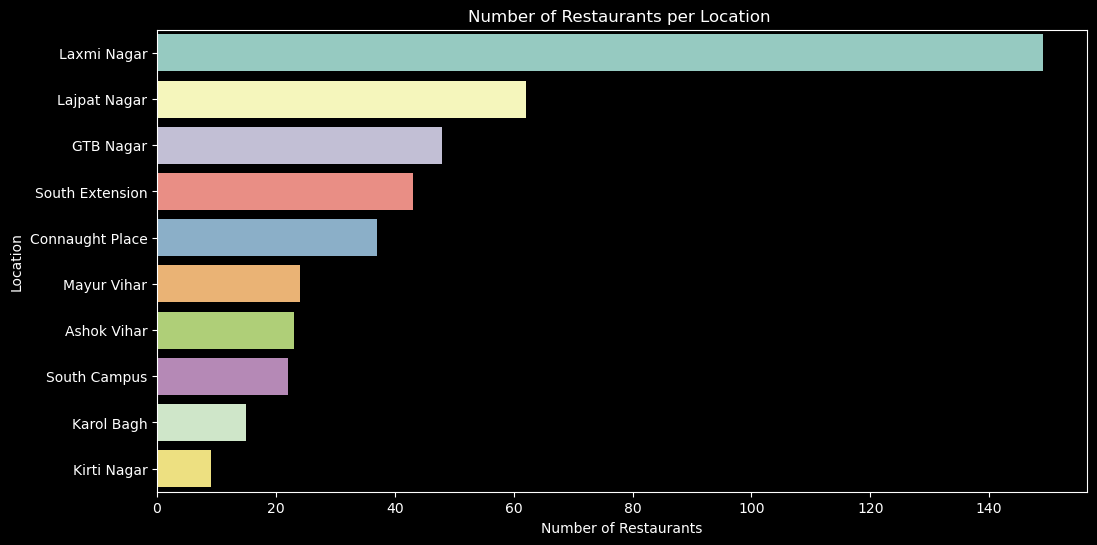

In [42]:
# Calculate the count of restaurants per location, excluding 'others'
location_counts = df[df['location'] != 'others']['location'].value_counts()

# Identify the top 10 locations
top_10_locations = location_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 locations
top_10_df = df[df['location'].isin(top_10_locations)]

# Plot the data
fig = plt.figure(figsize=(12, 6))
sns.countplot(y=top_10_df["location"], order=top_10_locations)
plt.title('Number of Restaurants per Location ')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

 ## Number of Restaurants per zone

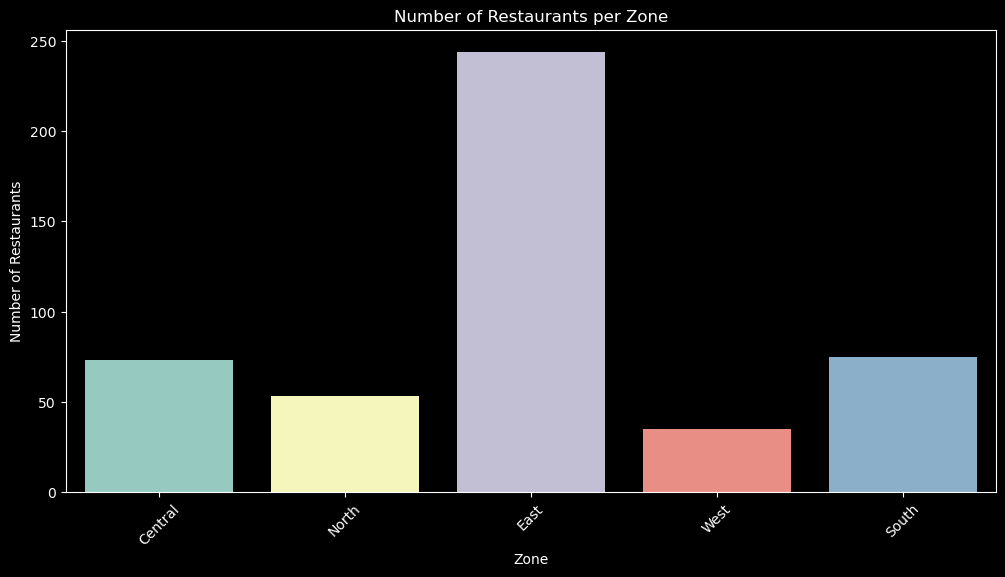

In [43]:
filtered_df = df[df['zone'] != 'others']

# Plot the data
fig = plt.figure(figsize=(12, 6))
sns.countplot(x=filtered_df["zone"])
plt.title('Number of Restaurants per Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

## Box plot for price per zone 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'Central'),
  Text(2, 0, 'North'),
  Text(3, 0, 'East'),
  Text(4, 0, 'West'),
  Text(5, 0, 'South')])

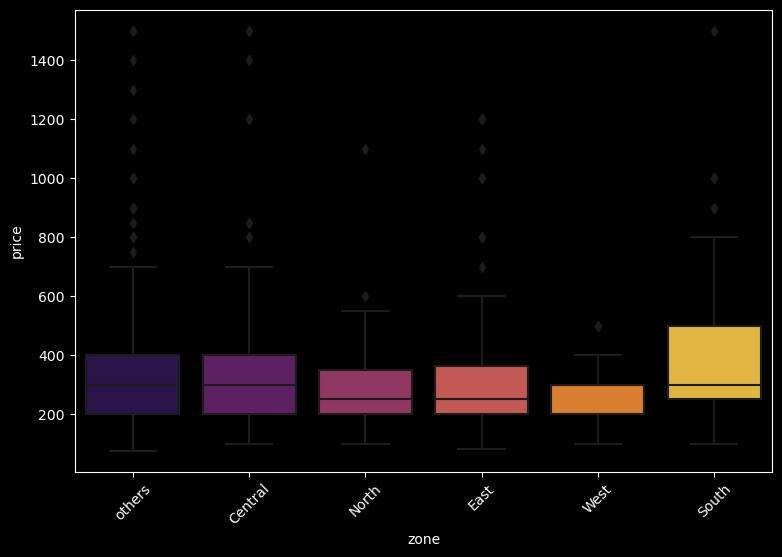

In [44]:
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'zone', y = 'cost2plates', data = df, palette = 'inferno')
plt.xlabel('zone')
plt.ylabel('price')
plt.xticks(rotation=45)

## Box plot for price per location 

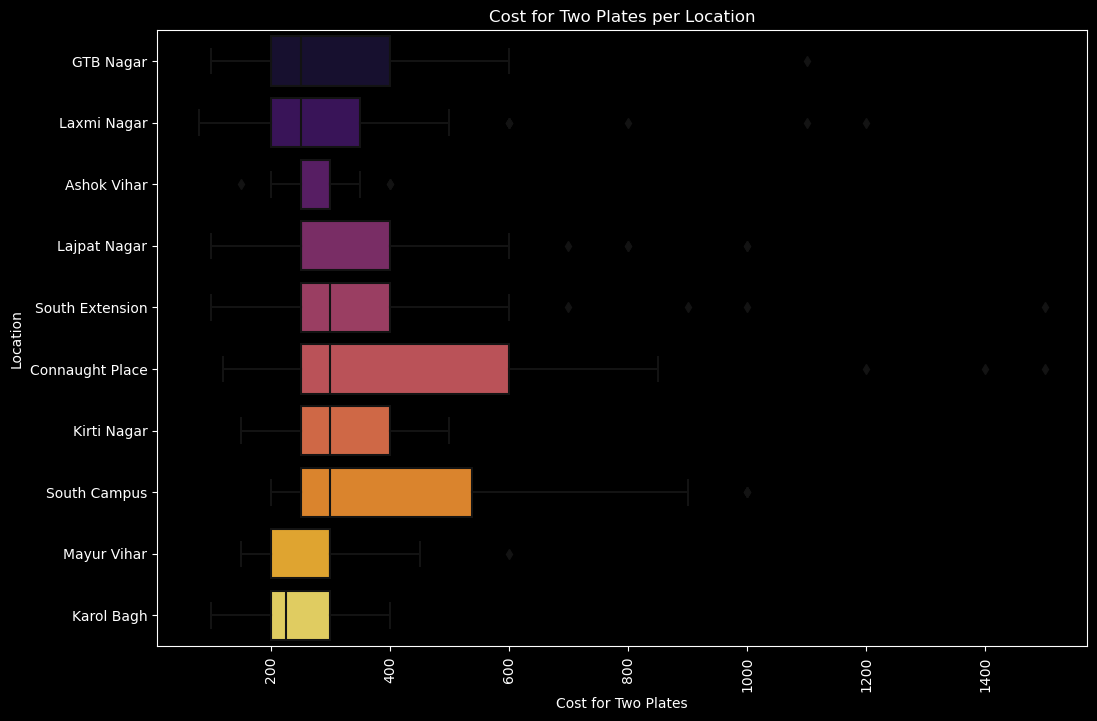

In [45]:
filtered_df = df[df['location'] != 'others']

# Calculate the count of restaurants per location from the filtered data
location_counts = filtered_df['location'].value_counts()

# Identify the top 10 locations
top_10_locations = location_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 locations
top_10_df = filtered_df[filtered_df['location'].isin(top_10_locations)]

# Plot the data
plt.figure(figsize=(12, 8))
sns.boxplot(y='location', x='cost2plates', data=top_10_df, palette='inferno')
plt.xlabel('Cost for Two Plates')
plt.ylabel('Location')
plt.title('Cost for Two Plates per Location')
plt.xticks(rotation=90)
plt.show()

## Plot for location wise ratings

/tmp/ipykernel_20/1654612932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop_duplicates(inplace=True)  # Drop duplicates based on both columns


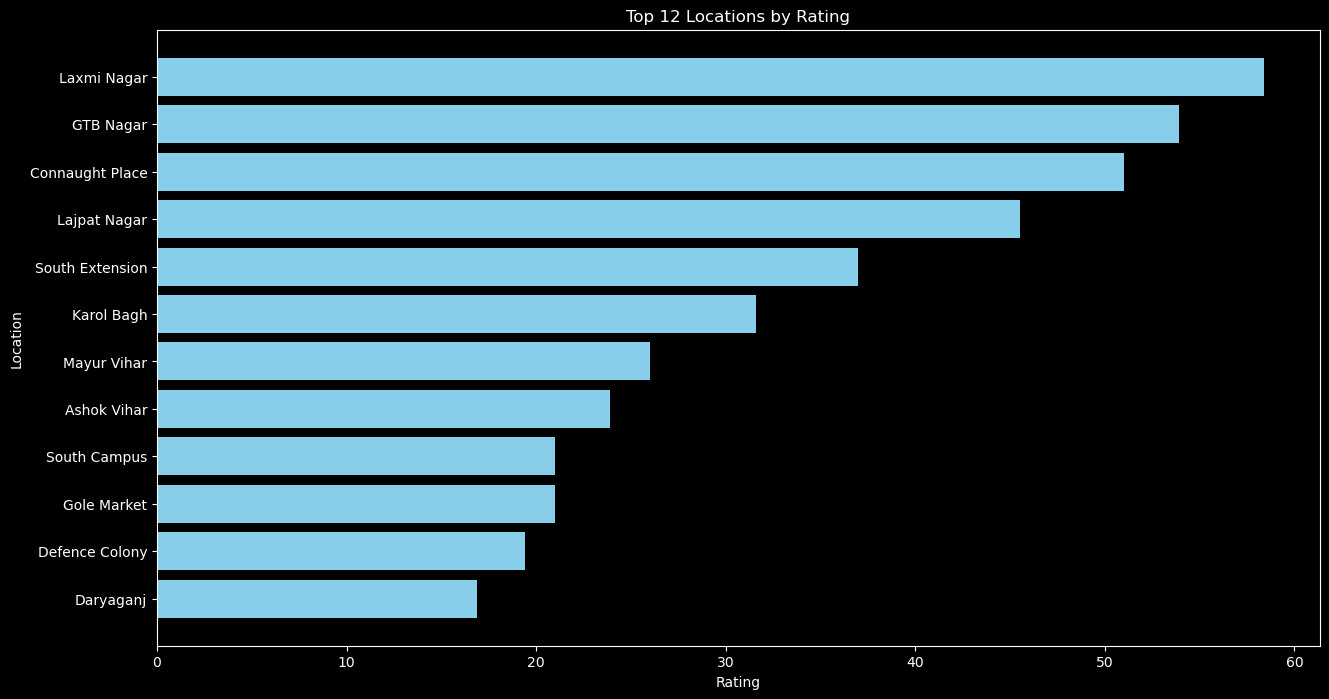

In [46]:

# Step 1: Prepare data
df4 = df[['location', 'rating']]
df4.drop_duplicates(inplace=True)  # Drop duplicates based on both columns

# Step 2: Grouping and aggregation
df5 = df4.groupby('location')['rating'].sum().reset_index()  # Summing up ratings per location

# Step 3: Sorting and filtering
df5 = df5.sort_values(by='rating', ascending=False)
df5 = df5.iloc[1:, :]  # Exclude the first row if it's not a specific location

# Step 4: Select top 12 locations
top_12_df = df5.head(12)

# Step 5: Plotting
plt.figure(figsize=(15, 8))
plt.barh(top_12_df['location'], top_12_df['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Location')
plt.title('Top 12 Locations by Rating')
plt.gca().invert_yaxis()  # Invert y-axis to have highest rating at the top
plt.show()


## Plot for zone wise ratings

In [47]:
df1 = df[['zone', 'rating']]
df1.drop_duplicates()
df2 = df1.groupby(['zone'])['rating'].count()
df2 = df2.to_frame()
df2 = df2.sort_values('rating', ascending=False)
df2.head()

,rating
zone,
East,244
others,228
South,75
Central,73
North,53


/tmp/ipykernel_20/1815132422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)  # Drop duplicates based on both columns


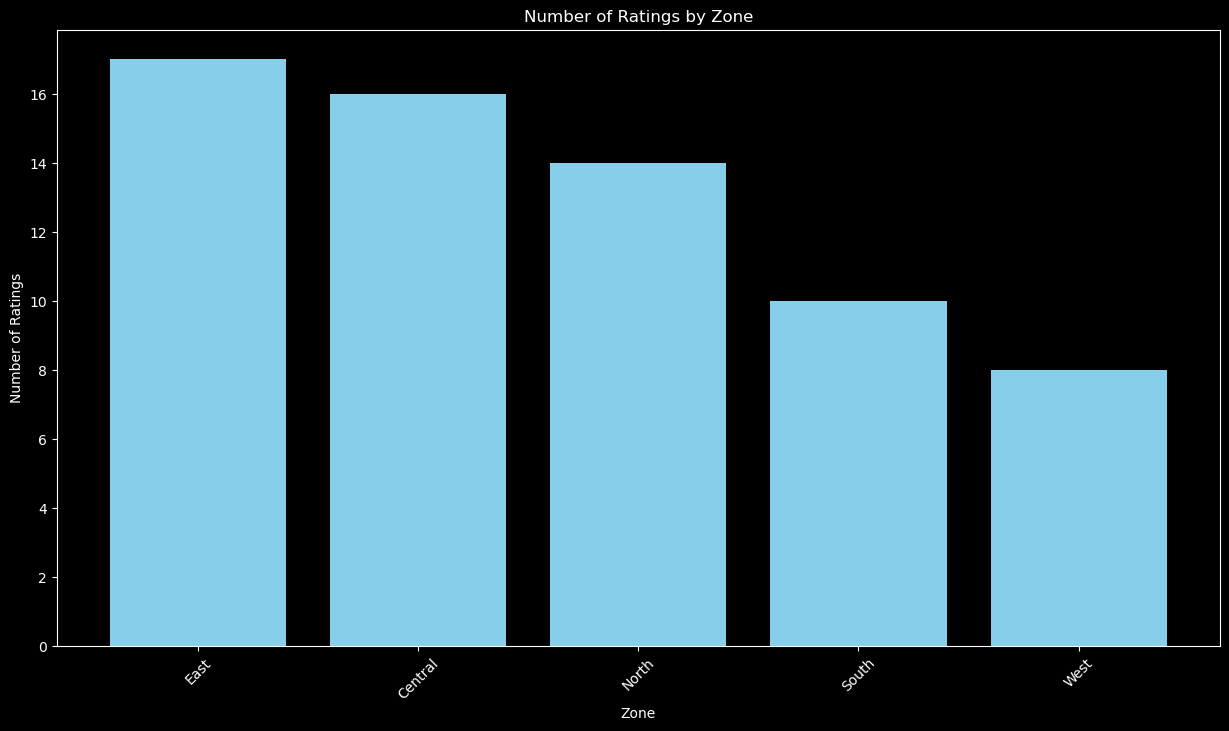

In [48]:
df1 = df[['zone', 'rating']]
df1.drop_duplicates(inplace=True)  # Drop duplicates based on both columns

df2 = df1.groupby('zone')['rating'].count().reset_index()  # Count ratings per zone

df2 = df2.sort_values(by='rating', ascending=False)
df2 = df2[df2['zone'] != 'others']  # Exclude 'others' if present

plt.figure(figsize=(15, 8))
plt.bar(df2['zone'], df2['rating'], color='skyblue')
plt.xlabel('Zone')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Zone')
plt.xticks(rotation=45)
plt.show()

## Visualizing number of ratings on the basis of zone

/tmp/ipykernel_20/3548582024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7.drop_duplicates(inplace=True)  # Drop duplicates based on both columns


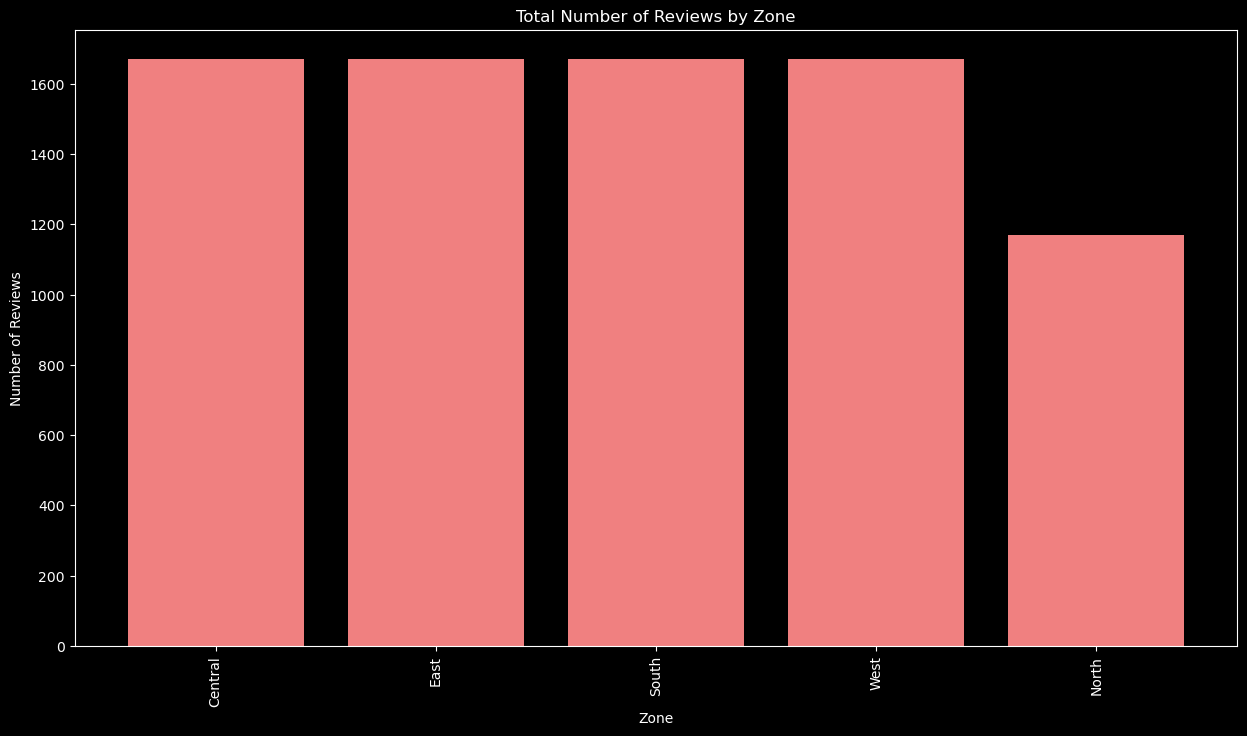

In [49]:
import matplotlib.pyplot as plt

# Step 1: Prepare data
df7 = df[['zone', 'num_of_rating']]
df7.drop_duplicates(inplace=True)  # Drop duplicates based on both columns

# Filter out 'others'
df7 = df7[df7['zone'] != 'others']

# Step 2: Grouping and aggregation
df8 = df7.groupby('zone')['num_of_rating'].sum().reset_index()  # Sum of num_of_rating per zone

# Step 3: Sorting
df8 = df8.sort_values(by='num_of_rating', ascending=False)

# Step 4: Plotting
plt.figure(figsize=(15, 8))
plt.bar(df8['zone'], df8['num_of_rating'], color='lightcoral')
plt.xlabel('Zone')
plt.ylabel('Number of Reviews')
plt.title('Total Number of Reviews by Zone')
plt.xticks(rotation=90)
plt.show()


## Visualizing types of restaurants zone wise

In [50]:
df6 = df.groupby(['zone','cuisine'])['name'].count()
df6.to_csv('zone_Type.csv')
df6 = pd.read_csv('zone_Type.csv')
df6 = pd.pivot_table(df6, values=None, index=['zone'], columns=['cuisine'], fill_value=0, aggfunc=np.sum)
df6

name                                                             \
cuisine , Desserts Bakery Bakery, Desserts Beverages Biryani Biryani, Mughlai   
zone                                                                            
Central          0      0                1         1       1                1   
East             2     10                6         2       5                0   
North            1      0                1         1       0                1   
South            0      3                4         2       0                0   
West             1      0                1         1       0                1   
others           4      3                6         4       2                4   

                                                                         ...  \
cuisine Biryani, North Indian Chinese Chinese, Asian Chinese, Fast Food  ...   
zone                                                                     ...   
Central                     0       2              0                  0  ...   
East                        1       1              1                  5  ...   
North                       0       2              0                  1  ...   
South                       3       2              3                  3  ...   
West                        0       2              0                  1  ...   
others                      1       9              1                  2  ...   

                                                                \
cuisine North Indian, Snacks North Indian, South Indian Pizzas   
zone                                                             
Central                    3                          2      0   
East                       4                          1      5   
North                      0                          0      0   
South                      1                          1      0   
West                       0                          0      0   
others                     1                          2      1   

                                                                    \
cuisine Pizzas, Fast Food Pizzas, Italian Snacks Snacks, Fast Food   
zone                                                                 
Central                 0               0      0                 0   
East                    3               4      3                 2   
North                   1               1      0                 0   
South                   0               1      0                 0   
West                    0               0      0                 0   
others                  1               2      3                 2   

                                                        
cuisine South Indian South Indian, North Indian others  
zone                                                    
Central            1                          0     29  
East               0                          2    102  
North              0                          1     31  
South              0                          0     26  
West               0                          0      9  
others             5                          1     90  

[6 rows x 37 columns]

<Figure size 1500x800 with 0 Axes>

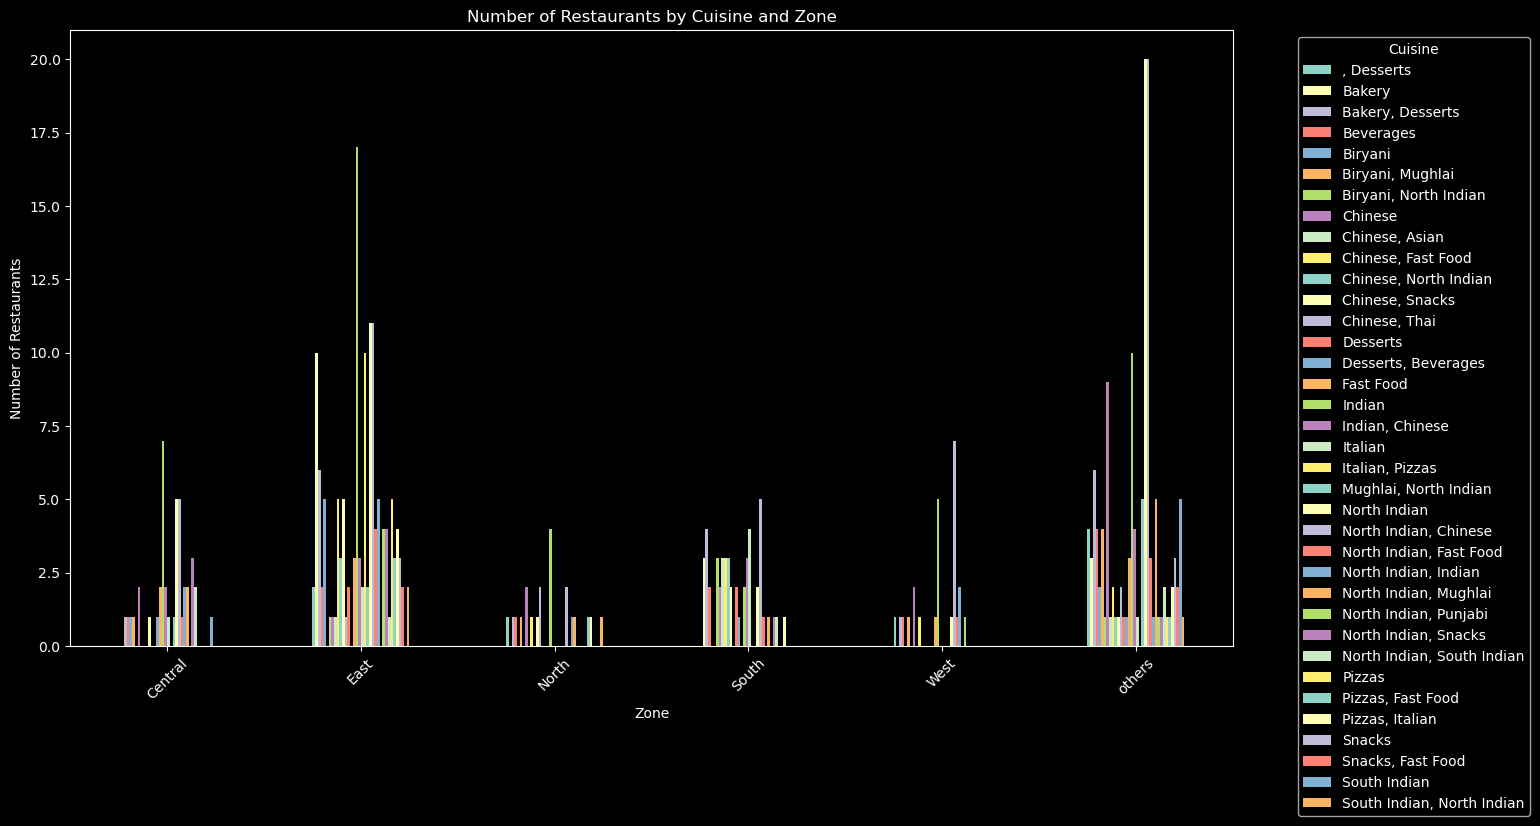

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Compute the count of restaurant names grouped by zone and cuisine
df6 = df.groupby(['zone', 'cuisine'])['name'].count().reset_index()

# Step 2: Save the resulting DataFrame to a CSV file
df6.to_csv('zone_type.csv', index=False)

# Step 3: Read the CSV file back into a DataFrame
df6 = pd.read_csv('zone_type.csv')

# Step 4: Exclude 'others' cuisine if present
df6 = df6[df6['cuisine'] != 'others']

# Step 5: Pivot the DataFrame to create the desired table
df6_pivot = pd.pivot_table(df6, values='name', index='zone', columns='cuisine', fill_value=0, aggfunc=np.sum)

# Step 6: Plot a bar chart for the refined DataFrame
plt.figure(figsize=(15, 8))
df6_pivot.plot(kind='bar', figsize=(15, 8))
plt.xlabel('Zone')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants by Cuisine and Zone')
plt.xticks(rotation=45)
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Visualizing top restaurants based on Ratings

In [52]:
df9 = df[['name', 'rating']]
df9.drop_duplicates()
df10 = df9.groupby(['name'])['rating'].sum()
df10 = df10.to_frame()
df10 = df10.sort_values('rating', ascending=False)
df10.head()

,rating
name,
Love At First Bite,8.005357
Jenny's Brownies,8.005357
Behrouz Biryani - Royal & Safe,4.700000
Momo Maker,4.700000
Triveni Terrace Cafe,4.700000


/tmp/ipykernel_20/500597173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.drop_duplicates(inplace=True)


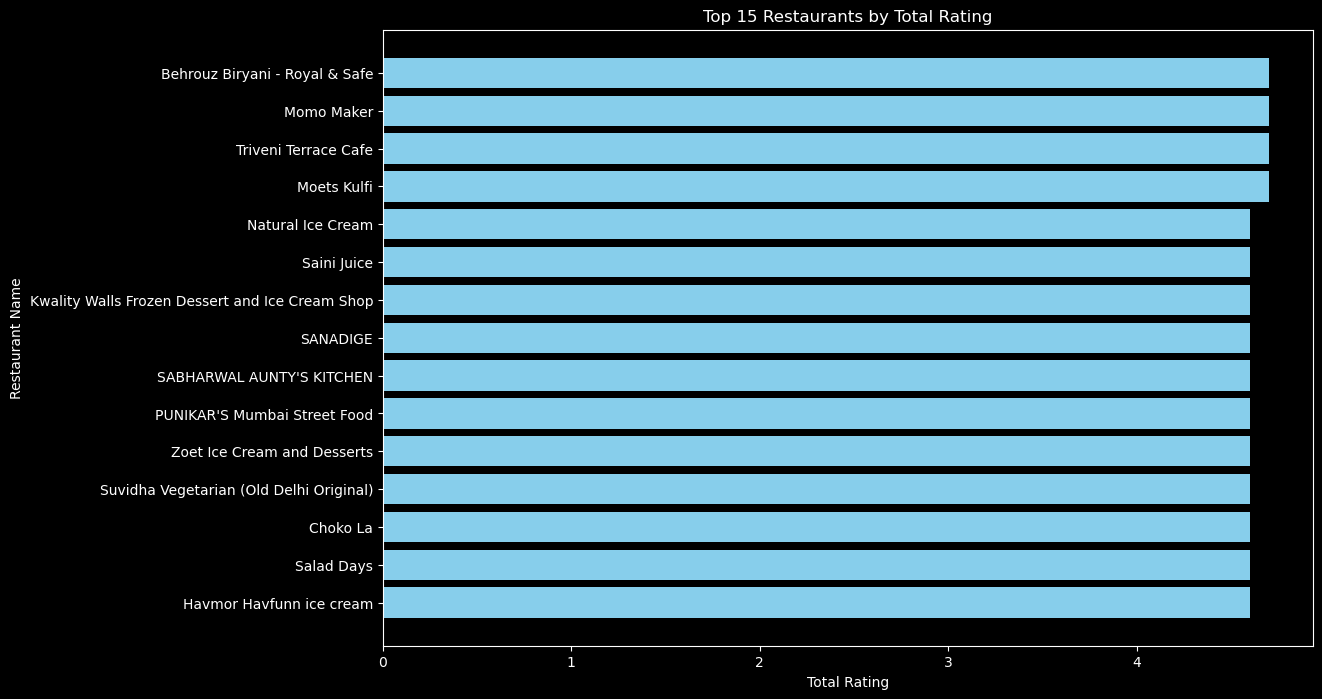

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Selecting relevant columns
df9 = df[['name', 'rating']]

# Step 2: Dropping duplicates based on 'name'
df9.drop_duplicates(inplace=True)

# Step 3: Grouping by 'name' and summing the 'rating' (assuming 'rating' column contains numeric values)
df10 = df9.groupby('name')['rating'].sum().reset_index()

# Step 4: Sorting by 'rating' in descending order
df10 = df10.sort_values(by='rating', ascending=False)

# Step 5: Selecting top 10 restaurants based on ratings
top_10_restaurants = df10.head(15)

# Step 6: Plotting the top 10 restaurants as horizontal bars
plt.figure(figsize=(12, 8))
plt.barh(top_10_restaurants['name'], top_10_restaurants['rating'], color='skyblue')
plt.ylabel('Restaurant Name')
plt.xlabel('Total Rating')
plt.title('Top 15 Restaurants by Total Rating')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating at the top
plt.show()


## Visualizing top restaurants based on number of ratings

In [54]:
df11 = df[['name', 'num_of_rating']]
df11.drop_duplicates()
df12 = df11.groupby(['name'])['num_of_rating'].sum()
df12 = df12.to_frame()
df12 = df12.sort_values('num_of_rating', ascending=False)
df12.head()

,num_of_rating
name,
Sita Ram Diwan Chand,1000
Burger King,1000
Shagun,1000
Jhakkas Bombay Pav Bhaji,1000
Bangla Foods,1000


/tmp/ipykernel_20/3375500174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11.drop_duplicates(inplace=True)


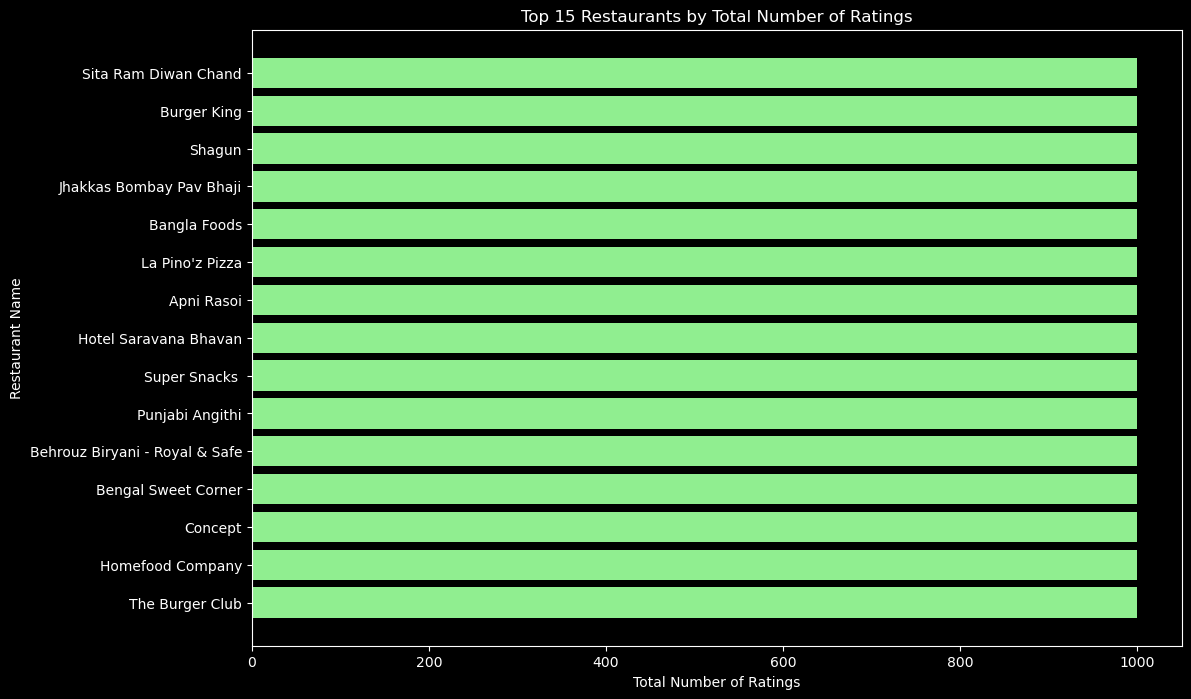

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Selecting relevant columns
df11 = df[['name', 'num_of_rating']]

# Step 2: Dropping duplicates based on 'name'
df11.drop_duplicates(inplace=True)

# Step 3: Grouping by 'name' and summing the 'num_of_rating'
df12 = df11.groupby('name')['num_of_rating'].sum().reset_index()

# Step 4: Sorting by 'num_of_rating' in descending order
df12 = df12.sort_values(by='num_of_rating', ascending=False)

# Step 5: Selecting top 15 restaurants based on number of ratings
top_15_restaurants = df12.head(15)

# Step 6: Plotting the top 15 restaurants as horizontal bars
plt.figure(figsize=(12, 8))
plt.barh(top_15_restaurants['name'], top_15_restaurants['num_of_rating'], color='lightgreen')
plt.xlabel('Total Number of Ratings')
plt.ylabel('Restaurant Name')
plt.title('Top 15 Restaurants by Total Number of Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest ratings at the top
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.show()
